In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%store -r data
%store -r data_test

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(11016, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  int64         
 5   dt                       11016 non-null  int64         
 6   city_name                11016 non-null  object        
 7   

In [4]:
print(data_test.columns)
print(data_test.shape)
print(data_test.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(2256, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injeção na rede (kWh)    0 non-null      float64       
 5   dt                       2256 non-null   int64         
 6   city_name                2256 non-null   object        
 7   tem

In [5]:
data_dt   = data.copy()
data_dt_test = data_test.copy()
rem = ['dt','pressure','wind_speed','Mes','Hora','city_name','Data','rain_1h','clouds_all'] 
data_dt.drop(rem,axis=1,inplace=True)
data_dt_test.drop(rem ,axis=1,inplace=True)
nulls = False
def interpolate_linear(data_dt_test):
    data_dt_test['temp']                = data_dt_test['temp'].interpolate(method='linear')
    data_dt_test['feels_like']          = data_dt_test['feels_like'].interpolate(method='linear')
    data_dt_test['temp_min']            = data_dt_test['temp_min'].interpolate(method='linear')
    data_dt_test['temp_max']            = data_dt_test['temp_max'].interpolate(method='linear')
    data_dt_test['humidity']            = data_dt_test['humidity'].interpolate(method='linear')
    # data_dt_test['clouds_all']          = data_dt_test['clouds_all'].fillna(0)
    data_dt_test['weather_description'] = data_dt_test['weather_description'].interpolate(method='linear')

if nulls:
    interpolate_linear(data_dt_test)
data_dt.info()
data_dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   humidity                 11016 non-null  int64  
 9   weather_description      11016 non-null  int64  
 10  Estacao                  11016 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 946.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 11 columns):
 #   Column                   

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y = data_dt['Injeção na rede (kWh)'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random)


In [7]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (11016, 10). X_train has shape (8262, 10) while X_test has shape (2754, 10)
The shape of y (11016, 1). y_train has shape (8262, 1) while y_test has shape (2754, 1)


C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


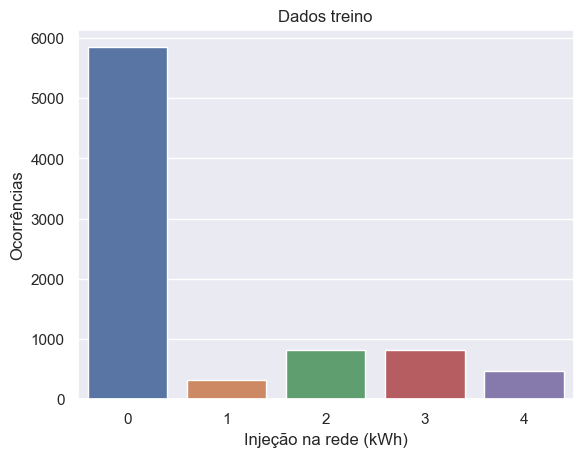

C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


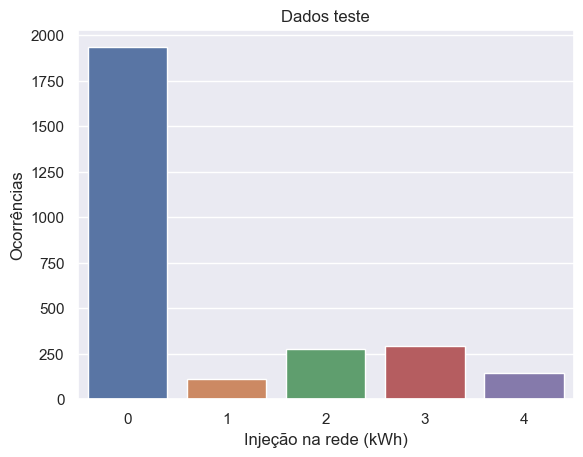

In [8]:
grafico_barras(y_train,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')
grafico_barras(y_test,'Injeção na rede (kWh)','Dados teste','Injeção na rede (kWh)','Ocorrências')

In [9]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import metrics
from scikeras.wrappers import KerasClassifier

In [11]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.1


In [12]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(32, input_dim=10, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(5, activation='softmax'))  # Adjusted for 5 classes
    
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.optimizers.Adam(learning_rate),
        metrics=['accuracy']
    )
    return model


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns = X.columns)

In [14]:
X.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,humidity,weather_description,Estacao
0,0.0,0.0,0.0,13.97,13.54,11.45,14.04,81,4,3
1,0.0,0.0,0.0,13.48,13.02,13.43,13.90,82,4,3
2,0.0,0.0,0.0,12.93,12.47,12.72,13.43,84,4,3
3,0.0,0.0,0.0,12.61,12.15,10.34,12.93,85,4,3
4,0.0,0.0,0.0,12.61,12.17,9.79,12.93,86,4,3


In [15]:
X_scaled.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,humidity,weather_description,Estacao
0,0.0,0.0,0.0,0.336788,0.361443,0.323608,0.316800,0.765432,0.428571,0.666667
1,0.0,0.0,0.0,0.324698,0.349494,0.376606,0.313310,0.777778,0.428571,0.666667
2,0.0,0.0,0.0,0.311128,0.336857,0.357602,0.301595,0.802469,0.428571,0.666667
3,0.0,0.0,0.0,0.303232,0.329504,0.293897,0.289133,0.814815,0.428571,0.666667
4,0.0,0.0,0.0,0.303232,0.329963,0.279176,0.289133,0.827160,0.428571,0.666667


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=2021)
print(y_train.value_counts())
print(y_test.value_counts())

Injeção na rede (kWh)
0                        5844
2                         822
3                         811
4                         463
1                         322
Name: count, dtype: int64
Injeção na rede (kWh)
0                        1933
3                         292
2                         276
4                         143
1                         110
Name: count, dtype: int64


In [17]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [18]:
kf = KFold(n_splits =10, shuffle = True, random_state = 2021)

In [19]:
build_model = build_model()
model = KerasClassifier(model = build_model, batch_size = 40, validation_split = 0.2, epochs = 20, random_state=2021)

In [20]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'accuracy',refit = 'True', verbose = 1,error_score='raise',)
grid_search.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpsexj2oq_\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpsexj2oq_\assets


Fitting 10 folds for each of 3 candidates, totalling 30 fits


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp42mu5e2o\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp42mu5e2o\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6607 - accuracy: 0.8566 - val_loss: 0.5000 - val_accuracy: 0.7001
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.7228 - val_loss: 0.4500 - val_accuracy: 0.7135
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7120 - val_loss: 0.4423 - val_accuracy: 0.7418
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.7086 - val_loss: 0.4334 - val_accuracy: 0.6994
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.7147 - val_loss: 0.4378 - val_accuracy: 0.6987
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.7132 - val_loss: 0.3953 - val_accuracy: 0.7122
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.7154 - val_loss: 0.3938 - val_accuracy: 0.7344
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpd7nacscn\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpd7nacscn\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6646 - accuracy: 0.8589 - val_loss: 0.4807 - val_accuracy: 0.7357
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4857 - accuracy: 0.7243 - val_loss: 0.4649 - val_accuracy: 0.7034
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.7144 - val_loss: 0.4234 - val_accuracy: 0.7115
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.7145 - val_loss: 0.4059 - val_accuracy: 0.7337
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.7209 - val_loss: 0.3830 - val_accuracy: 0.7176
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.7184 - val_loss: 0.3756 - val_accuracy: 0.7209
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.7214 - val_loss: 0.3798 - val_accuracy: 0.7202
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpnx95hk0u\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpnx95hk0u\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6733 - accuracy: 0.8695 - val_loss: 0.4591 - val_accuracy: 0.7352
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.7170 - val_loss: 0.5105 - val_accuracy: 0.6788
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7199 - val_loss: 0.4278 - val_accuracy: 0.6969
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.7204 - val_loss: 0.3932 - val_accuracy: 0.7272
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.7249 - val_loss: 0.3832 - val_accuracy: 0.7392
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.7251 - val_loss: 0.3770 - val_accuracy: 0.7298
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.7229 - val_loss: 0.3771 - val_accuracy: 0.7171
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpoj6yul42\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpoj6yul42\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6538 - accuracy: 0.8478 - val_loss: 0.4928 - val_accuracy: 0.7251
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7243 - val_loss: 0.4552 - val_accuracy: 0.7171
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4702 - accuracy: 0.7170 - val_loss: 0.4521 - val_accuracy: 0.6935
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4357 - accuracy: 0.7130 - val_loss: 0.4184 - val_accuracy: 0.7164
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.7192 - val_loss: 0.4181 - val_accuracy: 0.7218
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.7209 - val_loss: 0.4038 - val_accuracy: 0.7124
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.7181 - val_loss: 0.3964 - val_accuracy: 0.7218
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpd9du5ula\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpd9du5ula\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6531 - accuracy: 0.8510 - val_loss: 0.4756 - val_accuracy: 0.7366
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7207 - val_loss: 0.4240 - val_accuracy: 0.7204
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.7199 - val_loss: 0.3999 - val_accuracy: 0.7218
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.7229 - val_loss: 0.4073 - val_accuracy: 0.7056
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.7196 - val_loss: 0.4182 - val_accuracy: 0.7487
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.7179 - val_loss: 0.3899 - val_accuracy: 0.7392
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3954 - accuracy: 0.7213 - val_loss: 0.3946 - val_accuracy: 0.7285
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpj10ikv1v\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpj10ikv1v\assets


Epoch 1/20
149/149 [==============================] - 2s 6ms/step - loss: 0.6617 - accuracy: 0.8566 - val_loss: 0.4657 - val_accuracy: 0.7070
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.7209 - val_loss: 0.4624 - val_accuracy: 0.6821
Epoch 3/20
149/149 [==============================] - 1s 4ms/step - loss: 0.4426 - accuracy: 0.7187 - val_loss: 0.4048 - val_accuracy: 0.7103
Epoch 4/20
149/149 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.7211 - val_loss: 0.4040 - val_accuracy: 0.7130
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.7201 - val_loss: 0.3931 - val_accuracy: 0.7319
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.7197 - val_loss: 0.3935 - val_accuracy: 0.7272
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.7213 - val_loss: 0.3985 - val_accuracy: 0.7151
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmplm9kjq2r\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmplm9kjq2r\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6391 - accuracy: 0.8438 - val_loss: 0.5304 - val_accuracy: 0.6788
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4855 - accuracy: 0.7184 - val_loss: 0.4441 - val_accuracy: 0.7117
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4616 - accuracy: 0.7147 - val_loss: 0.4260 - val_accuracy: 0.7103
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.7159 - val_loss: 0.4031 - val_accuracy: 0.7258
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.7218 - val_loss: 0.4160 - val_accuracy: 0.6882
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.7209 - val_loss: 0.4024 - val_accuracy: 0.7043
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.7221 - val_loss: 0.3843 - val_accuracy: 0.7426
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpe852ft7a\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpe852ft7a\assets


Epoch 1/20
149/149 [==============================] - 2s 5ms/step - loss: 0.6412 - accuracy: 0.8394 - val_loss: 0.4784 - val_accuracy: 0.7426
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7246 - val_loss: 0.4505 - val_accuracy: 0.7063
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7145 - val_loss: 0.4505 - val_accuracy: 0.6882
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.7167 - val_loss: 0.4343 - val_accuracy: 0.7413
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.7226 - val_loss: 0.3902 - val_accuracy: 0.7251
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.7223 - val_loss: 0.3921 - val_accuracy: 0.7278
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.7207 - val_loss: 0.3802 - val_accuracy: 0.7144
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpa0z5pa2q\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpa0z5pa2q\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6412 - accuracy: 0.8258 - val_loss: 0.4676 - val_accuracy: 0.7527
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4783 - accuracy: 0.7181 - val_loss: 0.4306 - val_accuracy: 0.7224
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.7182 - val_loss: 0.4065 - val_accuracy: 0.7231
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.7182 - val_loss: 0.4107 - val_accuracy: 0.7298
Epoch 5/20
149/149 [==============================] - 1s 3ms/step - loss: 0.4057 - accuracy: 0.7207 - val_loss: 0.4258 - val_accuracy: 0.7077
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.7216 - val_loss: 0.3753 - val_accuracy: 0.7386
Epoch 7/20
149/149 [==============================] - 1s 3ms/step - loss: 0.3996 - accuracy: 0.7238 - val_loss: 0.3761 - val_accuracy: 0.7480
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpt6g74tze\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpt6g74tze\assets


Epoch 1/20
135/149 [==========================>...] - ETA: 0s - loss: 0.6708 - accuracy: 0.8704WARNING:tensorflow:Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


149/149 [==============================] - 2s 7ms/step - loss: 0.6597 - accuracy: 0.8549 - val_loss: 0.4802 - val_accuracy: 0.7292
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.7170 - val_loss: 0.4369 - val_accuracy: 0.7191
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4338 - accuracy: 0.7191 - val_loss: 0.4139 - val_accuracy: 0.7218
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.7189 - val_loss: 0.3986 - val_accuracy: 0.7117
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.7165 - val_loss: 0.4173 - val_accuracy: 0.7366
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.7204 - val_loss: 0.3981 - val_accuracy: 0.7305
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.7194 - val_loss: 0.3918 - val_accuracy: 0.7171
Epoch 8/20
149/14

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpxqeh76n_\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpxqeh76n_\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6607 - accuracy: 0.8566 - val_loss: 0.5000 - val_accuracy: 0.7001
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7228 - val_loss: 0.4500 - val_accuracy: 0.7135
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7120 - val_loss: 0.4423 - val_accuracy: 0.7418
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.7086 - val_loss: 0.4334 - val_accuracy: 0.6994
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.7147 - val_loss: 0.4378 - val_accuracy: 0.6987
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.7132 - val_loss: 0.3953 - val_accuracy: 0.7122
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.7154 - val_loss: 0.3938 - val_accuracy: 0.7344
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5gzxzvqh\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5gzxzvqh\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6646 - accuracy: 0.8589 - val_loss: 0.4807 - val_accuracy: 0.7357
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7243 - val_loss: 0.4649 - val_accuracy: 0.7034
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7144 - val_loss: 0.4234 - val_accuracy: 0.7115
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7145 - val_loss: 0.4059 - val_accuracy: 0.7337
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.7209 - val_loss: 0.3830 - val_accuracy: 0.7176
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.7184 - val_loss: 0.3756 - val_accuracy: 0.7209
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.7214 - val_loss: 0.3798 - val_accuracy: 0.7202
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpgzmubhjl\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpgzmubhjl\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6733 - accuracy: 0.8695 - val_loss: 0.4591 - val_accuracy: 0.7352
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7170 - val_loss: 0.5105 - val_accuracy: 0.6788
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7199 - val_loss: 0.4278 - val_accuracy: 0.6969
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.7204 - val_loss: 0.3932 - val_accuracy: 0.7272
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.7249 - val_loss: 0.3832 - val_accuracy: 0.7392
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.7251 - val_loss: 0.3770 - val_accuracy: 0.7298
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.7229 - val_loss: 0.3771 - val_accuracy: 0.7171
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmplbat2xj_\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmplbat2xj_\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6538 - accuracy: 0.8478 - val_loss: 0.4928 - val_accuracy: 0.7251
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7243 - val_loss: 0.4552 - val_accuracy: 0.7171
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7170 - val_loss: 0.4521 - val_accuracy: 0.6935
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.7130 - val_loss: 0.4184 - val_accuracy: 0.7164
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.7192 - val_loss: 0.4181 - val_accuracy: 0.7218
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.7209 - val_loss: 0.4038 - val_accuracy: 0.7124
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.7181 - val_loss: 0.3964 - val_accuracy: 0.7218
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp2e2o8kgf\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp2e2o8kgf\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6531 - accuracy: 0.8510 - val_loss: 0.4756 - val_accuracy: 0.7366
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7207 - val_loss: 0.4240 - val_accuracy: 0.7204
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.7199 - val_loss: 0.3999 - val_accuracy: 0.7218
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.7229 - val_loss: 0.4073 - val_accuracy: 0.7056
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.7196 - val_loss: 0.4182 - val_accuracy: 0.7487
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.7179 - val_loss: 0.3899 - val_accuracy: 0.7392
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.7213 - val_loss: 0.3946 - val_accuracy: 0.7285
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpfvh2cn0f\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpfvh2cn0f\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6617 - accuracy: 0.8566 - val_loss: 0.4657 - val_accuracy: 0.7070
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7209 - val_loss: 0.4624 - val_accuracy: 0.6821
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.7187 - val_loss: 0.4048 - val_accuracy: 0.7103
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7211 - val_loss: 0.4040 - val_accuracy: 0.7130
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.7201 - val_loss: 0.3931 - val_accuracy: 0.7319
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.7197 - val_loss: 0.3935 - val_accuracy: 0.7272
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.7213 - val_loss: 0.3985 - val_accuracy: 0.7151
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpmtm56eja\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpmtm56eja\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6391 - accuracy: 0.8438 - val_loss: 0.5304 - val_accuracy: 0.6788
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4855 - accuracy: 0.7184 - val_loss: 0.4441 - val_accuracy: 0.7117
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7147 - val_loss: 0.4260 - val_accuracy: 0.7103
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.7159 - val_loss: 0.4031 - val_accuracy: 0.7258
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.7218 - val_loss: 0.4160 - val_accuracy: 0.6882
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.7209 - val_loss: 0.4024 - val_accuracy: 0.7043
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.7221 - val_loss: 0.3843 - val_accuracy: 0.7426
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmptzw9borz\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmptzw9borz\assets


Epoch 1/20
149/149 [==============================] - 1s 5ms/step - loss: 0.6412 - accuracy: 0.8394 - val_loss: 0.4784 - val_accuracy: 0.7426
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7246 - val_loss: 0.4505 - val_accuracy: 0.7063
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7145 - val_loss: 0.4505 - val_accuracy: 0.6882
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4391 - accuracy: 0.7167 - val_loss: 0.4343 - val_accuracy: 0.7413
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.7226 - val_loss: 0.3902 - val_accuracy: 0.7251
Epoch 6/20
149/149 [==============================] - 1s 3ms/step - loss: 0.4112 - accuracy: 0.7223 - val_loss: 0.3921 - val_accuracy: 0.7278
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.7207 - val_loss: 0.3802 - val_accuracy: 0.7144
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp6gdczgcb\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp6gdczgcb\assets


Epoch 1/20
149/149 [==============================] - 2s 4ms/step - loss: 0.6412 - accuracy: 0.8258 - val_loss: 0.4676 - val_accuracy: 0.7527
Epoch 2/20
149/149 [==============================] - 1s 4ms/step - loss: 0.4783 - accuracy: 0.7181 - val_loss: 0.4306 - val_accuracy: 0.7224
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7182 - val_loss: 0.4065 - val_accuracy: 0.7231
Epoch 4/20
149/149 [==============================] - 1s 6ms/step - loss: 0.4218 - accuracy: 0.7182 - val_loss: 0.4107 - val_accuracy: 0.7298
Epoch 5/20
149/149 [==============================] - 1s 3ms/step - loss: 0.4057 - accuracy: 0.7207 - val_loss: 0.4258 - val_accuracy: 0.7077
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.7216 - val_loss: 0.3753 - val_accuracy: 0.7386
Epoch 7/20
149/149 [==============================] - 1s 3ms/step - loss: 0.3996 - accuracy: 0.7238 - val_loss: 0.3761 - val_accuracy: 0.7480
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmppjggz5ip\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmppjggz5ip\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6597 - accuracy: 0.8549 - val_loss: 0.4802 - val_accuracy: 0.7292
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7170 - val_loss: 0.4369 - val_accuracy: 0.7191
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7191 - val_loss: 0.4139 - val_accuracy: 0.7218
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.7189 - val_loss: 0.3986 - val_accuracy: 0.7117
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.7165 - val_loss: 0.4173 - val_accuracy: 0.7366
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.7204 - val_loss: 0.3981 - val_accuracy: 0.7305
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.7194 - val_loss: 0.3918 - val_accuracy: 0.7171
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpjnu6m4zp\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpjnu6m4zp\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6607 - accuracy: 0.8566 - val_loss: 0.5000 - val_accuracy: 0.7001
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7228 - val_loss: 0.4500 - val_accuracy: 0.7135
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7120 - val_loss: 0.4423 - val_accuracy: 0.7418
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.7086 - val_loss: 0.4334 - val_accuracy: 0.6994
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.7147 - val_loss: 0.4378 - val_accuracy: 0.6987
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.7132 - val_loss: 0.3953 - val_accuracy: 0.7122
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.7154 - val_loss: 0.3938 - val_accuracy: 0.7344
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpp1276_43\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpp1276_43\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6646 - accuracy: 0.8589 - val_loss: 0.4807 - val_accuracy: 0.7357
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7243 - val_loss: 0.4649 - val_accuracy: 0.7034
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7144 - val_loss: 0.4234 - val_accuracy: 0.7115
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7145 - val_loss: 0.4059 - val_accuracy: 0.7337
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.7209 - val_loss: 0.3830 - val_accuracy: 0.7176
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.7184 - val_loss: 0.3756 - val_accuracy: 0.7209
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.7214 - val_loss: 0.3798 - val_accuracy: 0.7202
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp59fqnn7b\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp59fqnn7b\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6733 - accuracy: 0.8695 - val_loss: 0.4591 - val_accuracy: 0.7352
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7170 - val_loss: 0.5105 - val_accuracy: 0.6788
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7199 - val_loss: 0.4278 - val_accuracy: 0.6969
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.7204 - val_loss: 0.3932 - val_accuracy: 0.7272
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.7249 - val_loss: 0.3832 - val_accuracy: 0.7392
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.7251 - val_loss: 0.3770 - val_accuracy: 0.7298
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.7229 - val_loss: 0.3771 - val_accuracy: 0.7171
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmptwv_w8py\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmptwv_w8py\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6538 - accuracy: 0.8478 - val_loss: 0.4928 - val_accuracy: 0.7251
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7243 - val_loss: 0.4552 - val_accuracy: 0.7171
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7170 - val_loss: 0.4521 - val_accuracy: 0.6935
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.7130 - val_loss: 0.4184 - val_accuracy: 0.7164
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.7192 - val_loss: 0.4181 - val_accuracy: 0.7218
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.7209 - val_loss: 0.4038 - val_accuracy: 0.7124
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.7181 - val_loss: 0.3964 - val_accuracy: 0.7218
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_nkamlo0\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_nkamlo0\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6531 - accuracy: 0.8510 - val_loss: 0.4756 - val_accuracy: 0.7366
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7207 - val_loss: 0.4240 - val_accuracy: 0.7204
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.7199 - val_loss: 0.3999 - val_accuracy: 0.7218
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.7229 - val_loss: 0.4073 - val_accuracy: 0.7056
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.7196 - val_loss: 0.4182 - val_accuracy: 0.7487
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.7179 - val_loss: 0.3899 - val_accuracy: 0.7392
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3954 - accuracy: 0.7213 - val_loss: 0.3946 - val_accuracy: 0.7285
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpfznuw8qn\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpfznuw8qn\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6617 - accuracy: 0.8566 - val_loss: 0.4657 - val_accuracy: 0.7070
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7209 - val_loss: 0.4624 - val_accuracy: 0.6821
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.7187 - val_loss: 0.4048 - val_accuracy: 0.7103
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7211 - val_loss: 0.4040 - val_accuracy: 0.7130
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.7201 - val_loss: 0.3931 - val_accuracy: 0.7319
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.7197 - val_loss: 0.3935 - val_accuracy: 0.7272
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.7213 - val_loss: 0.3985 - val_accuracy: 0.7151
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpcakplt35\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpcakplt35\assets


Epoch 1/20
149/149 [==============================] - 2s 5ms/step - loss: 0.6391 - accuracy: 0.8438 - val_loss: 0.5304 - val_accuracy: 0.6788
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7184 - val_loss: 0.4441 - val_accuracy: 0.7117
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4616 - accuracy: 0.7147 - val_loss: 0.4260 - val_accuracy: 0.7103
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.7159 - val_loss: 0.4031 - val_accuracy: 0.7258
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.7218 - val_loss: 0.4160 - val_accuracy: 0.6882
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.7209 - val_loss: 0.4024 - val_accuracy: 0.7043
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.7221 - val_loss: 0.3843 - val_accuracy: 0.7426
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpv03y733p\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpv03y733p\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.6412 - accuracy: 0.8394 - val_loss: 0.4784 - val_accuracy: 0.7426
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7246 - val_loss: 0.4505 - val_accuracy: 0.7063
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7145 - val_loss: 0.4505 - val_accuracy: 0.6882
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.7167 - val_loss: 0.4343 - val_accuracy: 0.7413
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7226 - val_loss: 0.3902 - val_accuracy: 0.7251
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.7223 - val_loss: 0.3921 - val_accuracy: 0.7278
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.7207 - val_loss: 0.3802 - val_accuracy: 0.7144
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpa044xsz3\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpa044xsz3\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6412 - accuracy: 0.8258 - val_loss: 0.4676 - val_accuracy: 0.7527
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7181 - val_loss: 0.4306 - val_accuracy: 0.7224
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7182 - val_loss: 0.4065 - val_accuracy: 0.7231
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.7182 - val_loss: 0.4107 - val_accuracy: 0.7298
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.7207 - val_loss: 0.4258 - val_accuracy: 0.7077
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.7216 - val_loss: 0.3753 - val_accuracy: 0.7386
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.7238 - val_loss: 0.3761 - val_accuracy: 0.7480
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpjggyju6l\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpjggyju6l\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6597 - accuracy: 0.8549 - val_loss: 0.4802 - val_accuracy: 0.7292
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7170 - val_loss: 0.4369 - val_accuracy: 0.7191
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7191 - val_loss: 0.4139 - val_accuracy: 0.7218
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.7189 - val_loss: 0.3986 - val_accuracy: 0.7117
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.7165 - val_loss: 0.4173 - val_accuracy: 0.7366
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.7204 - val_loss: 0.3981 - val_accuracy: 0.7305
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.7194 - val_loss: 0.3918 - val_accuracy: 0.7171
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpi7gbkqkr\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpi7gbkqkr\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmplwzflckm\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmplwzflckm\assets


Epoch 1/20
166/166 [==============================] - 1s 3ms/step - loss: 0.6409 - accuracy: 0.8408 - val_loss: 0.4805 - val_accuracy: 0.7181
Epoch 2/20
166/166 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7118 - val_loss: 0.4298 - val_accuracy: 0.7151
Epoch 3/20
166/166 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.7146 - val_loss: 0.4060 - val_accuracy: 0.7151
Epoch 4/20
166/166 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.7196 - val_loss: 0.4297 - val_accuracy: 0.7604
Epoch 5/20
166/166 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.7230 - val_loss: 0.3983 - val_accuracy: 0.7096
Epoch 6/20
166/166 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.7220 - val_loss: 0.3926 - val_accuracy: 0.7084
Epoch 7/20
166/166 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.7204 - val_loss: 0.3864 - val_accuracy: 0.7272
Epoch 

GridSearchCV(cv=KFold(n_splits=10, random_state=2021, shuffle=True),
             error_score='raise',
             estimator=KerasClassifier(batch_size=40, epochs=20, model=<keras.engine.sequential.Sequential object at 0x00000279FAD3E850>, random_state=2021, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='accuracy', verbose=1)

In [21]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: 0.838054 using {'optimizer': 'SGD'}


In [22]:
# means = grid_search.cv_results_['mean_test_score']
# stds = grid_search.cv_results_['std_test_score']
# params = grid_search.cv_results_['params']

In [23]:
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with %r" %(mean, stdev,param))

In [24]:
best_mlp_model = model

In [25]:
best_mlp_model.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test), verbose =1)

Epoch 1/30
207/207 [==============================] - 2s 3ms/step - loss: 0.5979 - accuracy: 0.8057 - val_loss: 0.4865 - val_accuracy: 0.7397
Epoch 2/30
207/207 [==============================] - 1s 3ms/step - loss: 0.4674 - accuracy: 0.7206 - val_loss: 0.4700 - val_accuracy: 0.6986
Epoch 3/30
207/207 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.7127 - val_loss: 0.4515 - val_accuracy: 0.6841
Epoch 4/30
207/207 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.7140 - val_loss: 0.4318 - val_accuracy: 0.7055
Epoch 5/30
207/207 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.7173 - val_loss: 0.4110 - val_accuracy: 0.7128
Epoch 6/30
207/207 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.7182 - val_loss: 0.4051 - val_accuracy: 0.7131
Epoch 7/30
207/207 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.7169 - val_loss: 0.3989 - val_accuracy: 0.7019
Epoch 

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x00000279FAD3E850>
	build_fn=None
	warm_start=False
	random_state=2021
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=40
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)

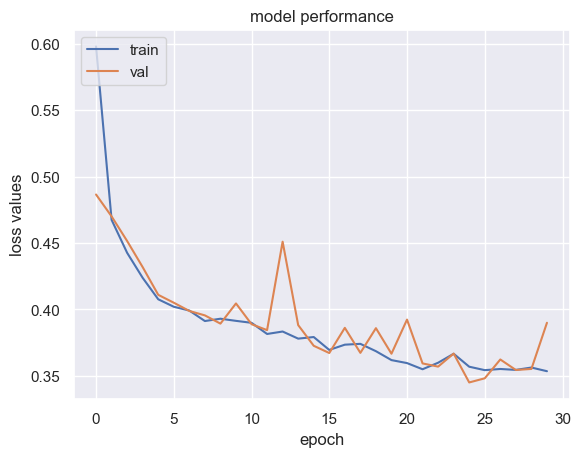

In [26]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

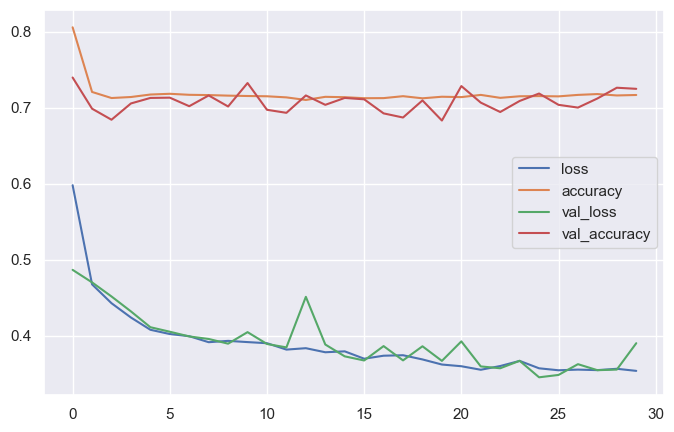

In [27]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

In [28]:
prediction = best_mlp_model.predict(X_test)

69/69 [==============================] - 0s 1ms/step


In [29]:
from sklearn import metrics

In [30]:
accuracy = metrics.accuracy_score(y_test, prediction)
#precision = metrics.precision_score(y_test, prediction, average='weighted')
#recall = metrics.recall_score(y_test, prediction, average='weighted')

print('Accuracy: ', accuracy)
#print('Precision: ', precision)
#print('Recall: ', recall)

Accuracy:  0.8209876543209876


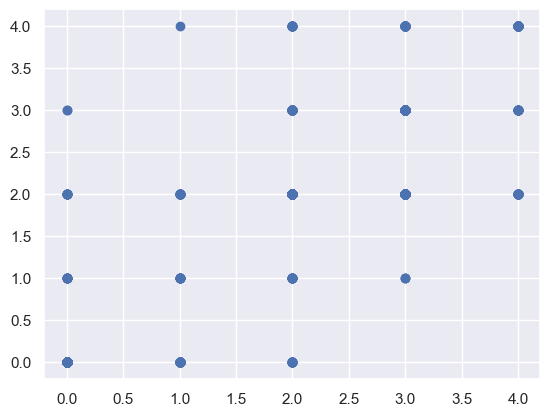

In [31]:
plt.scatter(y_test,prediction)

In [32]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit],color='green',label='Actual')
    plt.plot(prediction[:limit],color='red',label='Predicted')
    plt.grid(alpha=0.3)

    plt.title('Real x Predicted')
    plt.legend()
    plt.show()

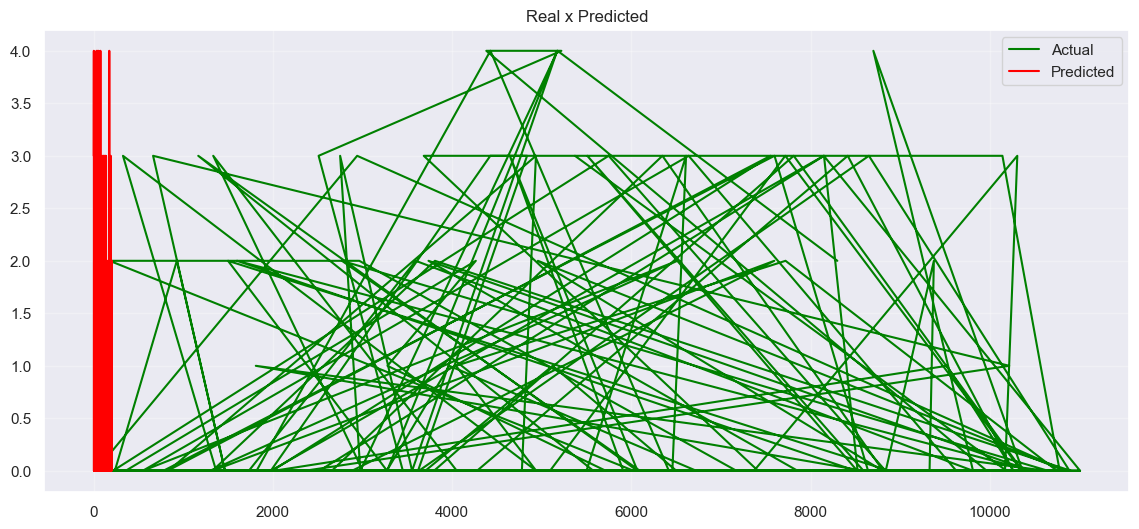

In [33]:
real_predicted_viz(200)

In [34]:
def gera_csv(predictions,name):
    row_ids = range(1, len(predictions) + 1)
    submission_df = pd.DataFrame({'RowId': row_ids, 'Result': predictions})
    replace_map = {'Result': {0:'None',1: 'Low', 2: 'Medium' ,3: 'High',4 : 'Very High' }}
    submission_df.replace(replace_map,inplace=True)
    submission_df.to_csv(name, index=False)

In [35]:
X_test_submission = data_dt_test.drop(['Injeção na rede (kWh)'],axis=1)
predictions_sub = best_mlp_model.predict(X_test_submission)
predictions_sub_2 = flat_list = [item for sublist in predictions_sub for item in sublist]
print(predictions_sub_2)

57/57 [==============================] - 0s 1ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [36]:
gera_csv(predictions_sub_2,'group20_an.csv')

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1933
           1       0.30      0.13      0.18       110
           2       0.43      0.51      0.46       276
           3       0.58      0.43      0.50       292
           4       0.46      0.52      0.49       143

    accuracy                           0.82      2754
   macro avg       0.54      0.52      0.52      2754
weighted avg       0.81      0.82      0.81      2754



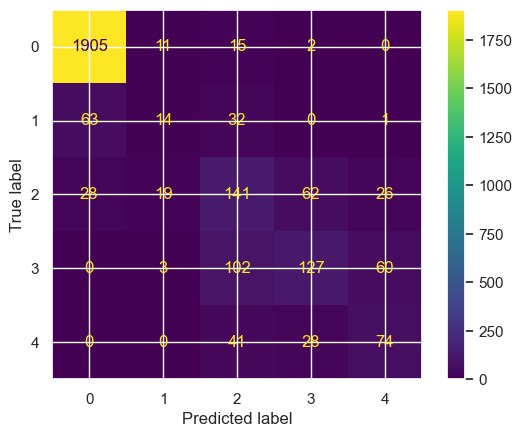

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,prediction)

plt.show()